In [9]:
from typing import List, Dict
from sympy import Point, Point2D, Segment
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
import numpy as np
# Load data
txt_lines = open("input.txt").read().splitlines()

# Visualization
Horizontal and vertical lines:

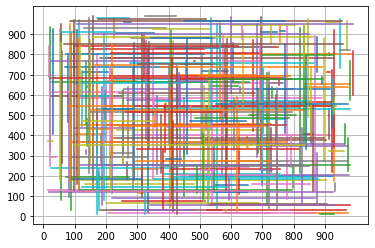

In [2]:
def str_to_point(p_str) -> Point:
    parts = p_str.split(",")
    return Point(int(parts[0]), int(parts[1]))
lines = [Segment(str_to_point(l.split(" -> ")[0]), str_to_point(l.split(" -> ")[1])) for l in txt_lines]

for l in [l for l in lines if l.p1.x == l.p2.x or l.p1.y == l.p2.y]:
    plt.plot([p.x for p in l.points], [p.y for p in l.points])
plt.xticks(range(0,1000,100))
plt.yticks(range(0,1000,100))
plt.grid()


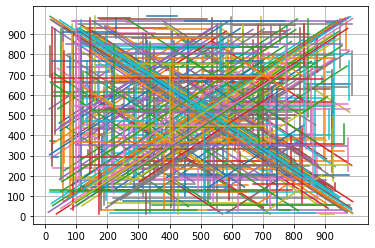

In [3]:
for l in [l for l in lines]:
    plt.plot([p.x for p in l.points], [p.y for p in l.points])
plt.xticks(range(0,1000,100))
plt.yticks(range(0,1000,100))
plt.grid()

All lines:

## Part 1 (slow)
> Consider only horizontal and vertical lines. At how many points do at least two lines overlap?
**Attention: Incredible slow!**

In [4]:
intersections: Dict[Point2D, int] = defaultdict(int)
filtered_lines = [l for l in lines if l.p1.x == l.p2.x or l.p1.y == l.p2.y] 
combs = list(combinations(filtered_lines, r=2))
i = 0
for l_pair in combs:
    i += 1
    if i % int(len(combs) / 20) == 0:
        print (f"{(i/(len(combs) / 100))} %")
    p = next(iter(l_pair[0].intersection(l_pair[1])), None)
    if p:
        if issubclass(type(p), Point):
                intersections[p] += 1
        elif issubclass(type(p), Segment):
            if p.p1.x == p.p2.x:
                for y in range(min(p.p1.y, p.p2.y), max(p.p1.y, p.p2.y)+1, 1):
                    intersections[Point(p.p1.x, y)] += 1
            else:
                for x in range(min(p.p1.x, p.p2.x), max(p.p1.x, p.p2.x)+1, 1):
                    intersections[Point(x, p.p1.y)] += 1

result = len(intersections)
print(result)

4.999454009391038 %
9.998908018782076 %
14.998362028173114 %
19.997816037564153 %
24.99727004695519 %
29.996724056346228 %
34.99617806573727 %
39.995632075128306 %
44.99508608451934 %
49.99454009391038 %
54.99399410330142 %
59.993448112692455 %
64.99290212208349 %
69.99235613147454 %
74.99181014086557 %
79.99126415025661 %
84.99071815964764 %
89.99017216903869 %
94.98962617842973 %
99.98908018782076 %
4421


## Part 1 & 2 (fast)
> Consider only horizontal and vertical lines. At how many points do at least two lines overlap?

In [51]:
lines = [[int(z) for z in x.replace(" -> ", ",").split(",")] for x in txt_lines]
mat_1 = np.zeros((1000,1000))
mat_2 = np.zeros((1000,1000))

for x1, y1, x2, y2 in lines:
    if x1 == x2:
        mat_1[min(y1,y2):max(y1,y2)+1,x1] += 1
    elif y1 == y2:
        mat_1[y1,min(x1,x2):max(x1,x2)+1] += 1
    else:
        l = [x1,y1,x2,y2] if x1 < x2 else [x2,y2,x1,y1]
        modi = 1 if l[1] < l[3] else -1
        for x in range(l[0],l[2]+1):
            y = modi * (x-l[0]) + l[1] 
            mat_2[y,x] += 1

result_1 = np.count_nonzero(mat_1 > 1)
result_2 = np.count_nonzero(mat_1+mat_2 > 1)
print(f"Part 1: {result_1}, Part 2: {result_2}")

Part 1: 4421, Part 2: 18674
